<a href="https://colab.research.google.com/github/Vikramalla/datascience/blob/main/RKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
data("iris")

In [ ]:
%%R
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


In [ ]:
%%R
install.packages("caret")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/listenv_0.8.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 36762 bytes (35 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [ ]:
%%R
library(caret)
data_split<-createDataPartition(iris$Species,p=0.8,list=FALSE)

In [ ]:
%%R
print(dim(data_split))
print(class(data_split))
print(data_split)

[1] 120   1
[1] "matrix" "array" 
       Resample1
  [1,]         1
  [2,]         2
  [3,]         4
  [4,]         5
  [5,]         6
  [6,]         7
  [7,]         8
  [8,]        10
  [9,]        12
 [10,]        13
 [11,]        14
 [12,]        15
 [13,]        16
 [14,]        17
 [15,]        18
 [16,]        19
 [17,]        20
 [18,]        22
 [19,]        23
 [20,]        24
 [21,]        26
 [22,]        27
 [23,]        28
 [24,]        29
 [25,]        30
 [26,]        32
 [27,]        34
 [28,]        35
 [29,]        36
 [30,]        38
 [31,]        39
 [32,]        40
 [33,]        41
 [34,]        42
 [35,]        43
 [36,]        46
 [37,]        47
 [38,]        48
 [39,]        49
 [40,]        50
 [41,]        51
 [42,]        52
 [43,]        53
 [44,]        54
 [45,]        55
 [46,]        58
 [47,]        59
 [48,]        60
 [49,]        61
 [50,]        63
 [51,]        65
 [52,]        66
 [53,]        67
 [54,]        68
 [55,]        69
 [56,]        

In [20]:
%%R
test_data<-iris[-data_split,]
train_data<-iris[data_split,]
print(dim(test_data))
print(dim(train_data))
print(test_data)
print(train_data)

[1] 30  5
[1] 120   5
    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
3            4.7         3.2          1.3         0.2     setosa
9            4.4         2.9          1.4         0.2     setosa
11           5.4         3.7          1.5         0.2     setosa
21           5.4         3.4          1.7         0.2     setosa
25           4.8         3.4          1.9         0.2     setosa
31           4.8         3.1          1.6         0.2     setosa
33           5.2         4.1          1.5         0.1     setosa
37           5.5         3.5          1.3         0.2     setosa
44           5.0         3.5          1.6         0.6     setosa
45           5.1         3.8          1.9         0.4     setosa
56           5.7         2.8          4.5         1.3 versicolor
57           6.3         3.3          4.7         1.6 versicolor
62           5.9         3.0          4.2         1.5 versicolor
64           6.1         2.9          4.7         1.4 versicolor
72 


    setosa versicolor  virginica 
        40         40         40 


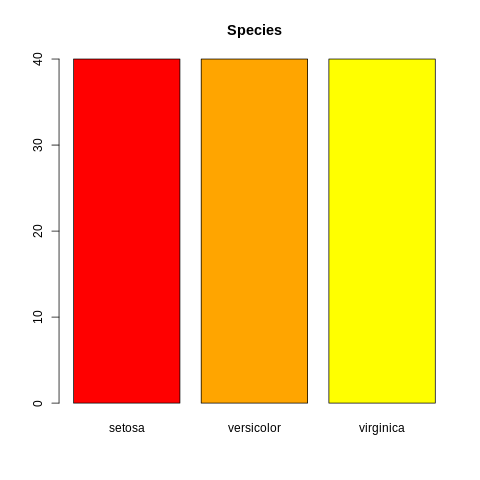

In [21]:
%%R
mytable<-table(train_data[,5])
print(mytable)
barplot(mytable,col=c("red","orange","yellow"),main=("Species"))

In [23]:
%%R
control<-trainControl(method="cv",number=10)
metric<-"Accuracy"
set.seed(7)
fit.knn<-train(train_data[,1:4],train_data[,5],method="knn",metric=metric,trControl=control)

In [24]:
%%R
print(fit.knn)

k-Nearest Neighbors 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa 
  5  0.9916667  0.9875
  7  0.9833333  0.9750
  9  0.9833333  0.9750

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.


In [25]:
%%R
test_data

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
3            4.7         3.2          1.3         0.2     setosa
9            4.4         2.9          1.4         0.2     setosa
11           5.4         3.7          1.5         0.2     setosa
21           5.4         3.4          1.7         0.2     setosa
25           4.8         3.4          1.9         0.2     setosa
31           4.8         3.1          1.6         0.2     setosa
33           5.2         4.1          1.5         0.1     setosa
37           5.5         3.5          1.3         0.2     setosa
44           5.0         3.5          1.6         0.6     setosa
45           5.1         3.8          1.9         0.4     setosa
56           5.7         2.8          4.5         1.3 versicolor
57           6.3         3.3          4.7         1.6 versicolor
62           5.9         3.0          4.2         1.5 versicolor
64           6.1         2.9          4.7         1.4 versicolor
72           6.1         

In [28]:
%%R
test_data[,1:4]

    Sepal.Length Sepal.Width Petal.Length Petal.Width
3            4.7         3.2          1.3         0.2
9            4.4         2.9          1.4         0.2
11           5.4         3.7          1.5         0.2
21           5.4         3.4          1.7         0.2
25           4.8         3.4          1.9         0.2
31           4.8         3.1          1.6         0.2
33           5.2         4.1          1.5         0.1
37           5.5         3.5          1.3         0.2
44           5.0         3.5          1.6         0.6
45           5.1         3.8          1.9         0.4
56           5.7         2.8          4.5         1.3
57           6.3         3.3          4.7         1.6
62           5.9         3.0          4.2         1.5
64           6.1         2.9          4.7         1.4
72           6.1         2.8          4.0         1.3
79           6.0         2.9          4.5         1.5
84           6.0         2.7          5.1         1.6
87           6.7         3.1

In [29]:
%%R
predictions<-predict(fit.knn,test_data[,1:4])
predictions

 [1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     versicolor versicolor
[13] versicolor versicolor versicolor versicolor virginica  versicolor
[19] versicolor versicolor versicolor virginica  virginica  virginica 
[25] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica
